In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('train_1.csv')
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
df.describe()

c:\python27\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,NaN,NaN,NaN
50%,3812.500000,1188.500000,NaN,NaN,NaN
75%,5795.000000,2297.250000,NaN,NaN,NaN
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
##getting all categorical columns
numr=list(df._get_numeric_data().columns)
cat=list(set(df.columns)-set(numr))
print cat

['Property_Area', 'Loan_ID', 'Gender', 'Married', 'Self_Employed', 'Loan_Status', 'Dependents', 'Education']


In [5]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [6]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [7]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [8]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [9]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [10]:
print df._get_numeric_data().columns

Index([u'ApplicantIncome', u'CoapplicantIncome', u'LoanAmount',
       u'Loan_Amount_Term', u'Credit_History'],
      dtype='object')


In [11]:
df['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

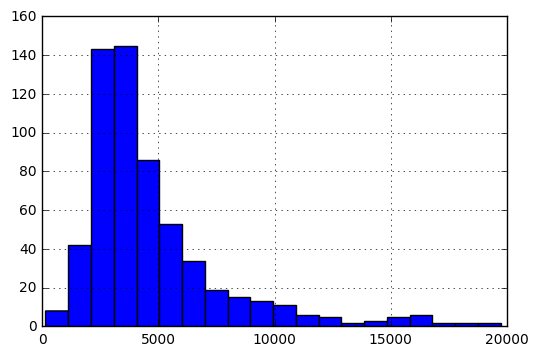

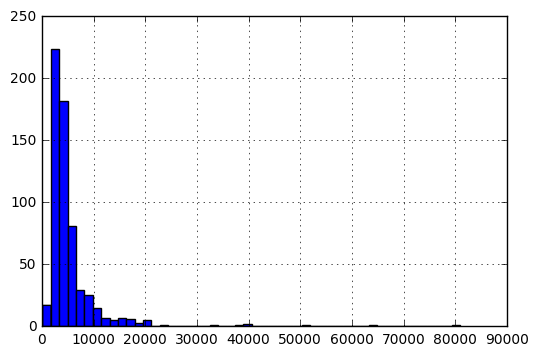

In [12]:
df2=df['ApplicantIncome']
df2[df2<20000].hist(bins=20)
plt.figure(2)
df['ApplicantIncome'].hist(bins=50)

plt.show()

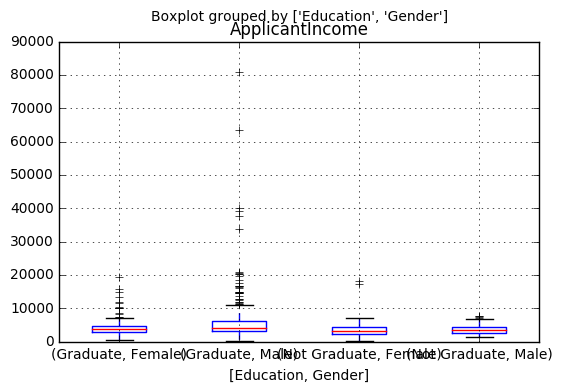

In [13]:
df.boxplot(column='ApplicantIncome',by=['Education','Gender'])
plt.show()

In [14]:
numr=list(df._get_numeric_data().columns)
cat=list(set(df.columns)-set(numr))
print cat

['Property_Area', 'Loan_ID', 'Gender', 'Married', 'Self_Employed', 'Loan_Status', 'Dependents', 'Education']


In [15]:
temp1=df['Credit_History'].value_counts()
print temp1
temp2=pd.pivot_table(df,values='Loan_Status',index=['Credit_History'],aggfunc=lambda x:x.map({'Y':1,'N':0}).mean())
print temp2

1.0    475
0.0     89
Name: Credit_History, dtype: int64
Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64


In [16]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [31]:
def func(ser):
    print ser
    return ser/float(ser[-1])

In [68]:
a=pd.crosstab([df.Married,df.Education],df.Loan_Status,margins=True)

In [69]:
b=a.apply(lambda x:x/10,axis=1)

In [70]:
b

Loan_Status              N     Y   All
Married Education                     
No      Graduate       6.2  10.6  16.8
        Not Graduate   1.7   2.8   4.5
Yes     Graduate       7.8  23.1  30.9
        Not Graduate   3.5   5.4   8.9
All                   19.2  41.9  61.1

In [73]:
a=a.apply(lambda x:x/float(x[-1]),axis=1)
a=a.drop('All',axis=1)

In [74]:
a

Loan_Status                  N         Y
Married Education                       
No      Graduate      0.369048  0.630952
        Not Graduate  0.377778  0.622222
Yes     Graduate      0.252427  0.747573
        Not Graduate  0.393258  0.606742
All                   0.314239  0.685761

In [75]:
a.plot(kind='bar',stacked=True,grid=False)

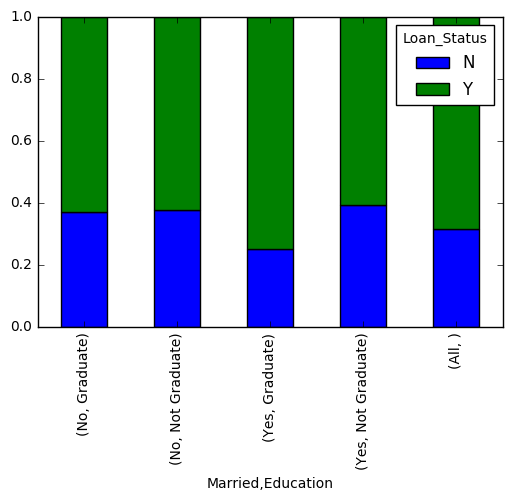

In [76]:
plt.show()